In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

c:\Users\Cr0l3y\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
(train_images, train_labels), _ = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype("float32")
train_images = (train_images - 127.5)/127.5

In [4]:
batch_size = 256
train_ds = tf.data.Dataset.from_tensor_slices(train_images).shuffle(6000).batch(batch_size)

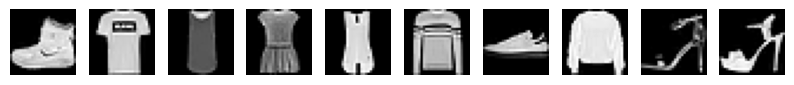

In [5]:
image_show = 10
plt.figure(figsize=(10,10))
for i in range(image_show):
    plt.subplot(1, image_show, i+1)
    plt.imshow(train_images[i].reshape(28,28), cmap="gray")
    plt.axis("off")

In [10]:
def constroi_gerador():
    modelo = Sequential()

    modelo.add(layers.Input(shape=(100,)))
    modelo.add(layers.Dense(7*7*256, use_bias=False))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.LeakyReLU())

    modelo.add(layers.Reshape((7, 7, 256)))
    modelo.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.LeakyReLU())

    modelo.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.LeakyReLU())

    modelo.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return modelo

In [11]:
gerador = constroi_gerador()

(-0.5, 27.5, 27.5, -0.5)

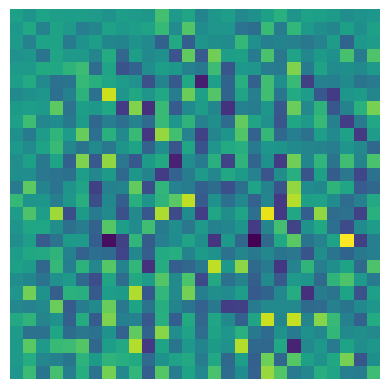

In [15]:
dimensao_ruido = 100
ruido = tf.random.normal([1, dimensao_ruido])
imagem_gerada = gerador(ruido, training=False)
plt.imshow(imagem_gerada[0]*127.5+127.5)
plt.axis("off")

In [ ]:
def constroi_discriminador():

    modelo = Sequential()

    modelo.add(layers.Input(shape=(28, 28, 1)))
    modelo.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    modelo.add(layers.LeakyReLU())
    modelo.add(layers.Dropout(0.3))

    modelo.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    modelo.add(layers.LeakyReLU())
    modelo.add(layers.Dropout(0.3))

    modelo.add(layers.Flatten())
    modelo.add(layers.Dense(1))

    return modelo

In [19]:
discriminador = constroi_discriminador()
decisao = discriminador(imagem_gerada)
print(decisao)

tf.Tensor([[0.00286235]], shape=(1, 1), dtype=float32)
